# GRB bn090926181

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

from gbm import test_data_dir as tdd
from gbm.binning.unbinned import bin_by_time as bbt
from gbm.background import BackgroundFitter
from gbm.background.binned import Polynomial
from gbm.data import Cspec
from gbm.data import TTE, RSP
from gbm.data import PHA
from gbm.plot import Lightcurve, Spectrum
from gbm.spectra.fitting import SpectralFitterPgstat
from gbm.spectra.functions import Band

In [2]:
print("=== DESTELLO bn090926181 ===")
print("=== DETECTOR n7 ===")

=== DESTELLO bn090926181 ===
=== DETECTOR n7 ===


In [17]:
downloads_path = "Datos/bn090926181/current/"
# downloads_path = os.path.join(
#     os.path.expanduser("~"), "F807", "Trabajos", "Datos", "bn090926181", "current"
# )

# print("Ruta:", os.getcwd())

pha_file_n7 = os.path.join(downloads_path, "glg_cspec_n7_bn090926181_v00.pha")
rsp2_file_n7 = os.path.join(downloads_path, "glg_cspec_n7_bn090926181_v00.rsp2")

tte_file = os.path.join(downloads_path, "glg_tte_n7_bn090926181_v00.fit")
rsp_file = os.path.join(downloads_path, "glg_cspec_n7_bn090926181_v00.rsp2")

tte = TTE.open(tte_file)
rsp = RSP.open(rsp_file)
cspec_n7 = Cspec.open(pha_file_n7)

phaii = tte.to_phaii(bbt, 1.024, time_ref=0.0)

print(" CSPEC n7 cargado")
print(" Matriz de respuesta .rsp2 disponible")

 CSPEC n7 cargado
 Matriz de respuesta .rsp2 disponible


/home/karna/.pyenv/versions/3.6.15/lib/python3.6/site-packages/astropy/_erfa/core.py:104: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "' + func_name + '" yielded ' + wmsg, ErfaWarning)
/home/karna/.pyenv/versions/3.6.15/lib/python3.6/site-packages/astropy/_erfa/core.py:104: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "' + func_name + '" yielded ' + wmsg, ErfaWarning)


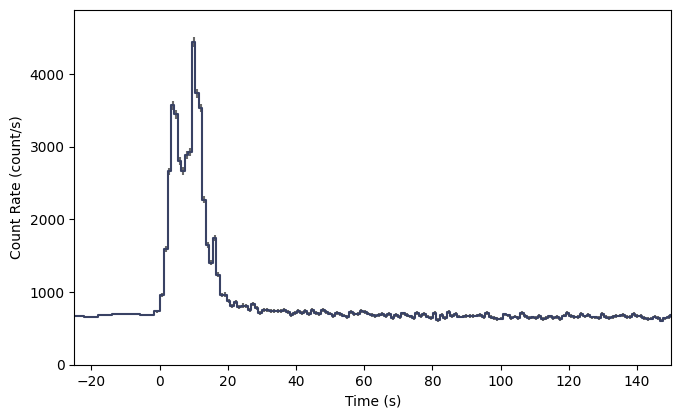

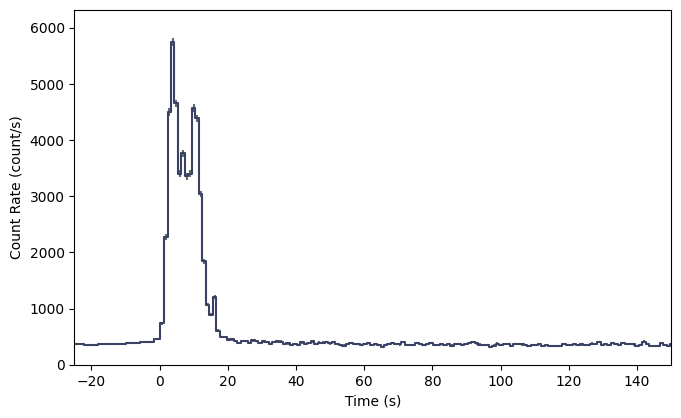

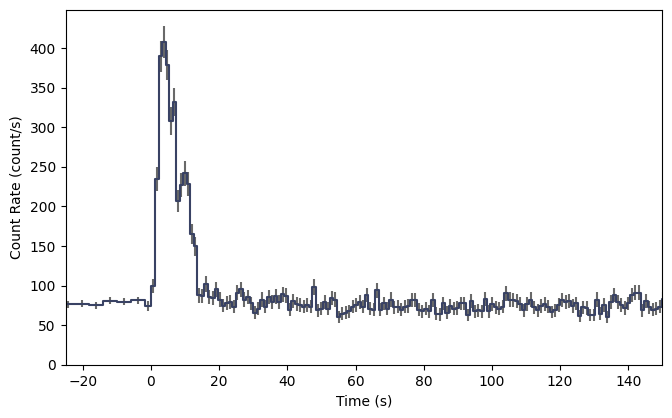

In [42]:
# Bandas de energía
erange1 = (8.0, 50.0)
erange2 = (50.0, 300.0)
erange3 = (300.0, 900.0)

# Curvas de luz
lc_data1 = cspec_n7.to_lightcurve(energy_range=erange1)
lc_data2 = cspec_n7.to_lightcurve(energy_range=erange2)
lc_data3 = cspec_n7.to_lightcurve(energy_range=erange3)

lcplot1 = Lightcurve(data=lc_data1)
lcplot2 = Lightcurve(data=lc_data2)
lcplot3 = Lightcurve(data=lc_data3)

time_range = (-25, 150)

lcplot1.xlim = time_range
lcplot2.xlim = time_range
lcplot3.xlim = time_range

In [19]:
print("=== AJUSTE PARA EL BACKGROUND ===")

=== AJUSTE PARA EL BACKGROUND ===


In [ ]:
bkgd_times = [(-20.0, -5.0), (75.0, 200.0)]
backfitter = BackgroundFitter.from_phaii(phaii, Polynomial, time_ranges=bkgd_times)
backfitter.fit(order=1)
backfitter.statistic/backfitter.dof
bkgd = backfitter.interpolate_bins(phaii.data.tstart, phaii.data.tstop)
type(bkgd)

gbm.background.background.BackgroundRates

### Ajuste y preparación en BKGD

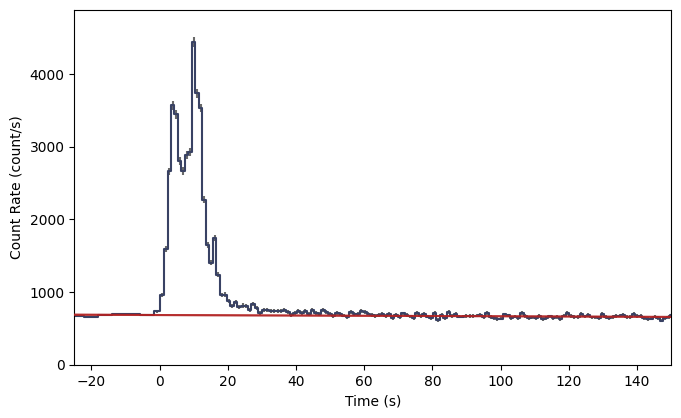

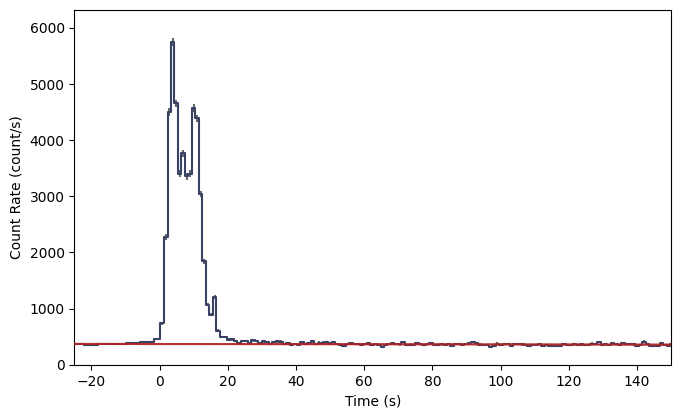

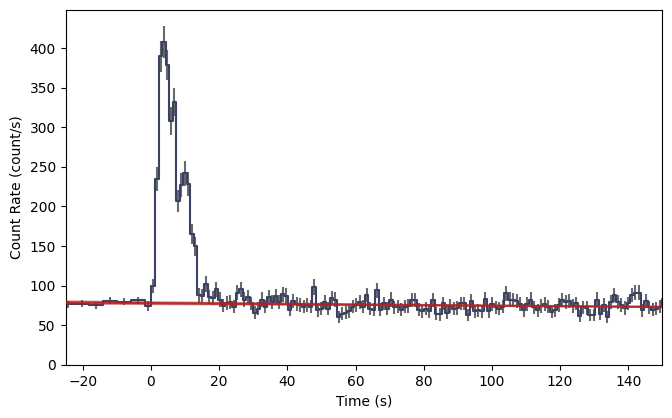

In [38]:
# Curva 1
lc_bkgd1 = bkgd.integrate_energy(*erange1)
lcplot1 = Lightcurve(data=lc_data1, background=lc_bkgd1)

# Curva 1
lc_bkgd2 = bkgd.integrate_energy(*erange2)
lcplot2 = Lightcurve(data=lc_data2, background=lc_bkgd2)

# Curva 1
lc_bkgd3 = bkgd.integrate_energy(*erange3)
lcplot3 = Lightcurve(data=lc_data3, background=lc_bkgd3)

lcplot1.xlim = time_range
lcplot2.xlim = time_range
lcplot3.xlim = time_range

### Zoom de la Gráfica

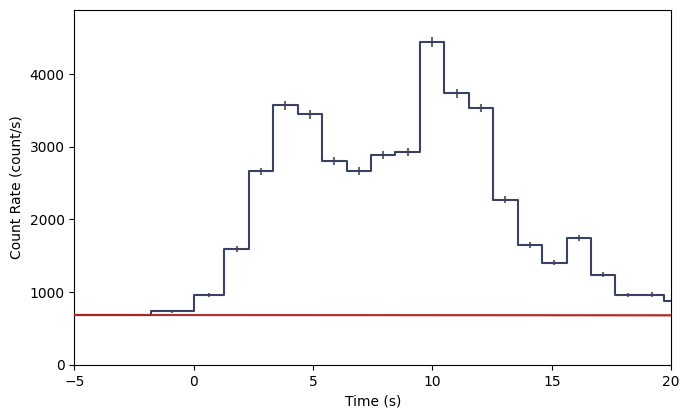

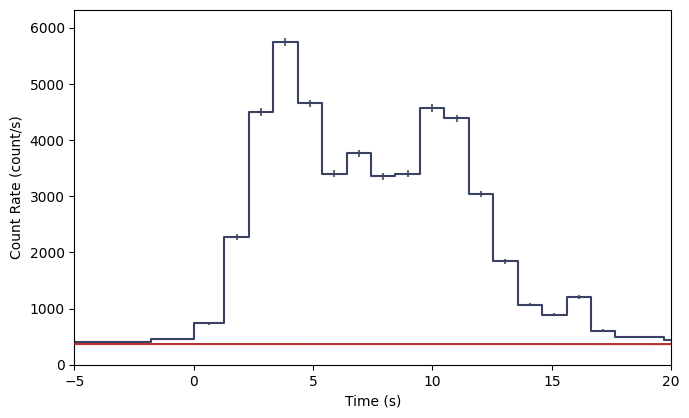

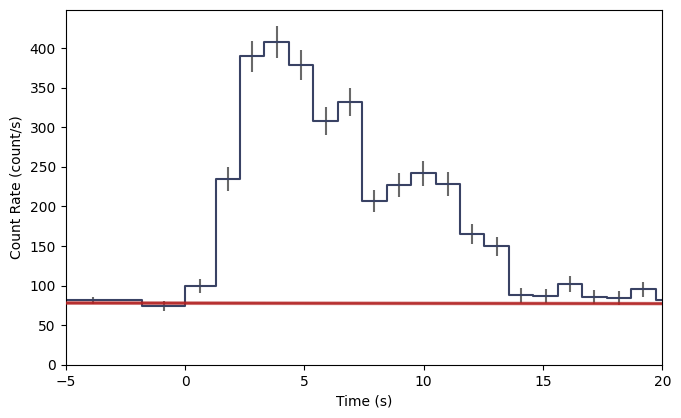

In [39]:
view_range = (-5.0, 20.0)

# Curva 1
lcplot1 = Lightcurve(data=lc_data1, background=lc_bkgd1)
lcplot1.xlim = view_range

# Curva 1
lcplot2 = Lightcurve(data=lc_data2, background=lc_bkgd2)
lcplot2.xlim = view_range

# Curva 1
lcplot3 = Lightcurve(data=lc_data3, background=lc_bkgd3)
lcplot3.xlim = view_range

### Ajuste y selección del bin

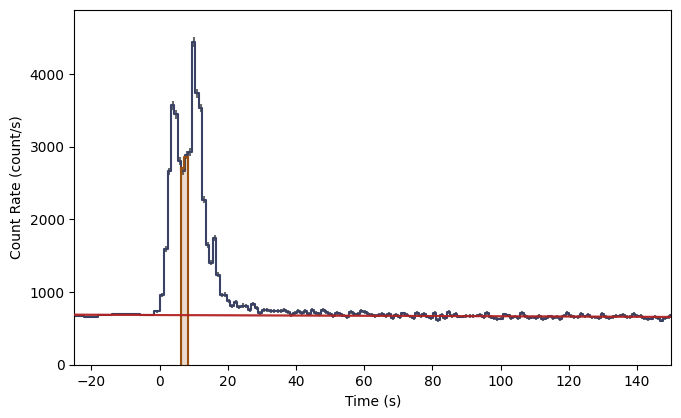

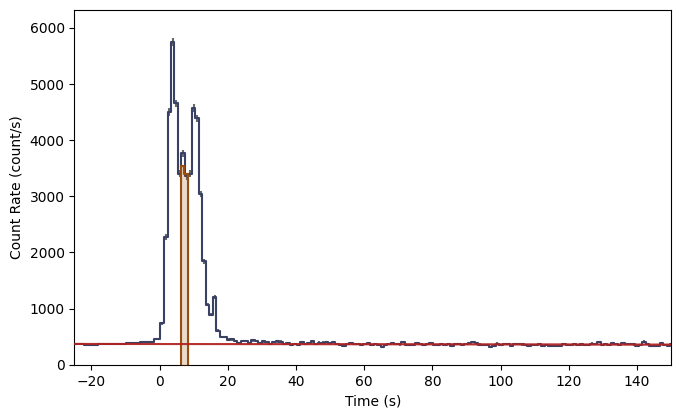

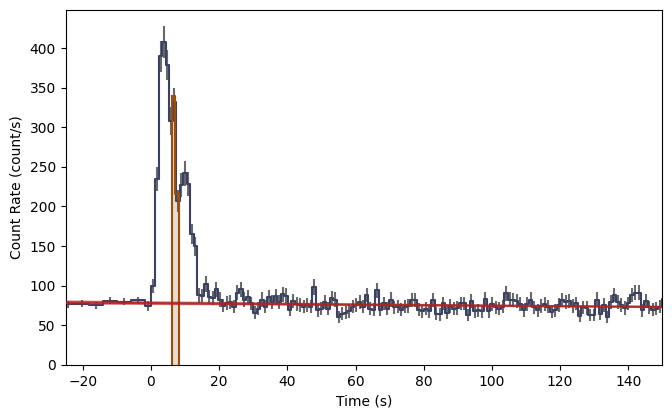

In [40]:
src_time = (7.0, 8.0)

# Curva 1
src_lc1 = phaii.to_lightcurve(time_range=src_time, energy_range=erange1)
lcplot1 = Lightcurve(data=lc_data1, background=lc_bkgd1)
lcplot1.add_selection(src_lc1)

# Curva 2
src_lc2 = phaii.to_lightcurve(time_range=src_time, energy_range=erange2)
lcplot2 = Lightcurve(data=lc_data2, background=lc_bkgd2)
lcplot2.add_selection(src_lc2)

# Curva 3
src_lc3 = phaii.to_lightcurve(time_range=src_time, energy_range=erange3)
lcplot3 = Lightcurve(data=lc_data3, background=lc_bkgd3)
lcplot3.add_selection(src_lc3)

lcplot1.xlim = time_range
lcplot2.xlim = time_range
lcplot3.xlim = time_range

### Ajuste del espectro para las 3 bandas

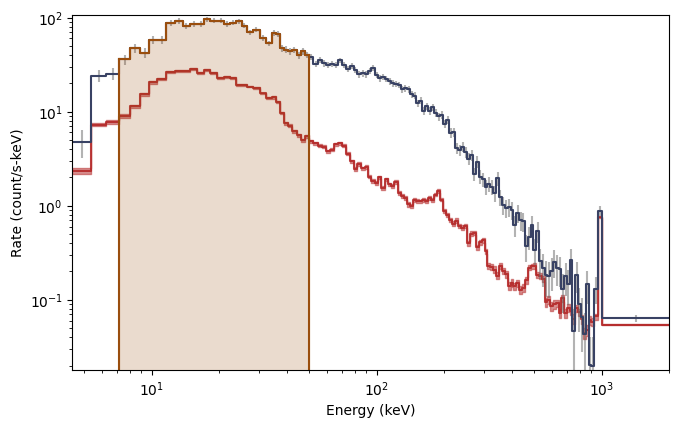

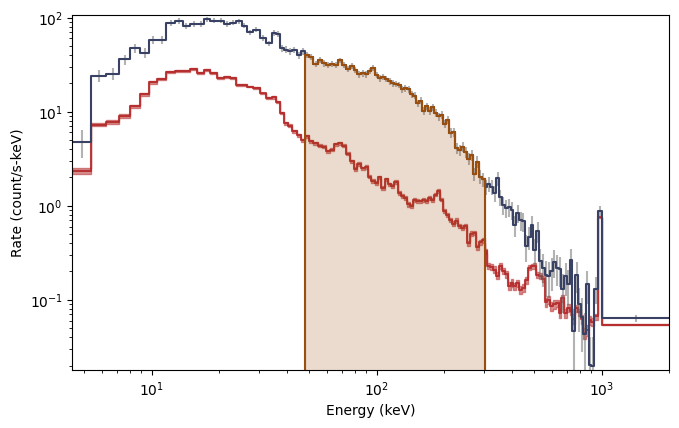

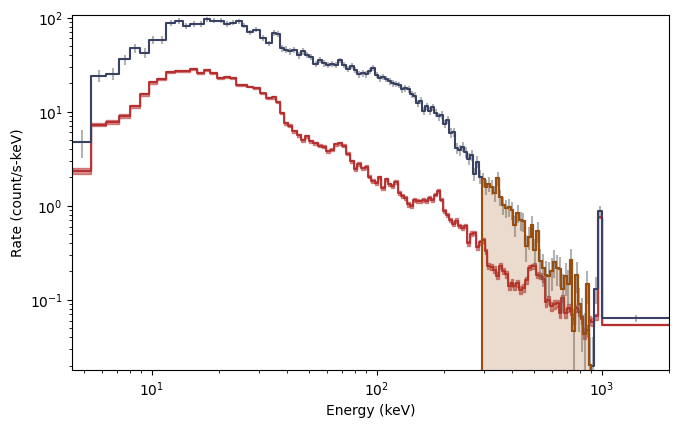

In [41]:
spec_data = phaii.to_spectrum(time_range=src_time)
spec_bkgd = bkgd.integrate_time(*src_time)

# Curva 1
spec_selection1 = phaii.to_spectrum(time_range=src_time, energy_range=erange1)
specplot1 = Spectrum(data=spec_data, background=spec_bkgd)
specplot1.add_selection(spec_selection1)

# Curva 2
spec_selection2 = phaii.to_spectrum(time_range=src_time, energy_range=erange2)
specplot2 = Spectrum(data=spec_data, background=spec_bkgd)
specplot2.add_selection(spec_selection2)

# Curva 3
spec_selection3 = phaii.to_spectrum(time_range=src_time, energy_range=erange3)
specplot3 = Spectrum(data=spec_data, background=spec_bkgd)
specplot3.add_selection(spec_selection3)